### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

visits = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Adv_app_losses/visits_info_short.csv')
display(visits.head())

orders = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Adv_app_losses/orders_info_short.csv')
display(orders.head())

costs = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Adv_app_losses/costs_info_short.csv')
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [2]:
print('Таблица о визитах')
visits.info()
print('Таблица о заказах')
orders.info()
print('Таблица о стоимостях')
costs.info()

Таблица о визитах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Таблица о заказах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Таблица о стоимостях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries,

**Таблица о визитах состоит из 6 столбцов и 309901 строки с разными типами значений.**

**Количественные переменные (вещественные):**
* User_id

**Категориальные переменные:**
* Region
* Device
* Channel
* Session Start
* Session End

**Таблица о заказах состоит из 3 столбцов и 40212 строк с разными типами значений.**

**Количественные переменные (вещественные):**
* User_id

**Категориальные переменные:**
* Event Dt

**Вещественные переменные:**
* Revenue

**Таблица о стоимостях состоит из 3 столбцов и 1800 строк с разными типами значений.**

**Категориальные переменные:**
* dt
* Channel

**Вещественные переменные:**
* costs

Явных пропусков данных нет.
Из всех представленных данных необходимо только преобразовать данные с датами (Session Start, Session End, Event Dt, dt) из формата Object в формат date_time.

In [3]:
#проверяю дубликаты
print('Общее число дубликатов:', visits.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', visits.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [4]:
#проверяю дубликаты
print('Общее число дубликатов:', orders.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', orders.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [5]:
#проверяю дубликаты
print('Общее число дубликатов:', costs.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', costs.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: dt         0
Channel    0
costs      0
dtype: int64


Дубликатов и пропусков данных не выявлено.

In [6]:
#посмотреть уникальные значения по ряду столбцов
print('Значения в Region таблицы visits:', visits['Region'].sort_values().unique())
print('Количество в Region таблицы visits:', len(visits['Region'].unique()))

print('Значения в Device таблицы visits:', visits['Device'].sort_values().unique())
print('Количество в Device таблицы visits:', len(visits['Device'].unique()))

print('Значения в Channel таблицы visits:', visits['Channel'].sort_values().unique())
print('Количество в Channel таблицы visits:', len(visits['Channel'].unique()))


Значения в Region таблицы visits: ['France' 'Germany' 'UK' 'United States']
Количество в Region таблицы visits: 4
Значения в Device таблицы visits: ['Android' 'Mac' 'PC' 'iPhone']
Количество в Device таблицы visits: 4
Значения в Channel таблицы visits: ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']
Количество в Channel таблицы visits: 11


In [7]:
#переименуем ряд заголовков: уберем пробелы и сделаем написание строчными буквами
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)
visits.rename(columns = {'user id' : 'user_id', 'session start' : 'session_start', 'session end' : 'session_end'}, inplace = True)
orders.rename(columns = {'user id' : 'user_id', 'event dt' : 'event_dt'}, inplace = True)

In [8]:
display(visits.head())
display(orders.head())
display(costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [9]:
#приведем все даты к формату to_datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [10]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [19]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head())

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [20]:
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].max())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


In [21]:
#выясним, из каких стран приходят посетители
country_total = profiles.groupby('region').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(country_total)

,quantity
region,
United States,100002
UK,17575
France,17450
Germany,14981


Чаще всего посетители приходят из США. Разрыв с другими странами очень существенный: больше, чем в 5 раз.

In [22]:
#выясним, какие страны дают больше всего платящих пользователей
country_payer = profiles.query('payer==True').groupby('region').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(country_payer)

,quantity
region,
United States,6902
UK,700
France,663
Germany,616


Число платящих пользователей также выше в США: в 10 раз больше по сравнению с другими странами.

In [23]:
#построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
country_total = country_total.merge(country_payer, on='region', how='left')
country_total['payer_share']=(country_total['quantity_y']/country_total['quantity_x'])*100
display(country_total)

,quantity_x,quantity_y,payer_share
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


Доля платящих пользователей среди всех посетителей также выше в США (6,9%), на втором месте со значительным отставанием - Германия (4,11%).

Таким образом, пользователи из США не только чаще пользуются приложением, они же чаще оплачивают в нем дополнительные покупки.

In [24]:
#выясним, какими устройствами они пользуются?
device_total = profiles.groupby('device').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(device_total)

,quantity
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


Чаще всего пользователи используют iPhone, на втором месте смартфоны на базе Android (в 1,5 раза меньше). Третье делят с небольшим отрывом пользователи PC и Mac.

In [25]:
#выясним, с каких устройств чаще всего заходят платящие пользователи
device_payer=profiles.query('payer==True').groupby('device').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(device_payer)

,quantity
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


Чаще всего платящие пользователи используют iPhone, на втором месте смартфоны на базе Android. На третьем месте - пользователи Mac.

In [26]:
#построим таблицу, отражающую количество пользователей и долю платящих с каждого устройства
device_total = device_total.merge(device_payer, on='device', how='left')
device_total['payer_share']=(device_total['quantity_y']/device_total['quantity_x'])*100
display(device_total.sort_values(by='payer_share', ascending=False))

,quantity_x,quantity_y,payer_share
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


Чаще всего платящие пользователи заходят с Mac (доля 6,36%), на втором месте - iPhone (доля 6,20%). На третьем и четвертом, соответственно, Android и PC. Таким образом, несмотря на то, что, например, количество пользователей PC и Mac в целом равно, платят чаще пользователи Mac.

In [27]:
#выясним, по каким рекламным каналам шло привлечение пользователей
channel_total = profiles.groupby('channel').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(channel_total)

,quantity
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


Чаще всего пользователи приходили самостоятельно без рекламы (почти в 2 раза чаще, чем по первому источнику рекламы). Второй по численности поток идет с Faceboom, третий - c TipTop. Все остальные каналы сильно отстают по численности привлекаемых посетителей.

In [28]:
#выясним, какие каналы приносят больше всего платящих пользователей
channel_payer = profiles.query('payer==True').groupby('channel').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'quantity'}).sort_values(by='quantity', ascending = False)
display(channel_payer)

,quantity
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


Платящие пользователи в абсолютных значениях чаще всего приходят от рекламы на FaceBoom, затем с TipTop, на третьем месте - те, кто пришли самостоятельно.

In [29]:
#построим таблицу, отражающую количество пользователей и долю платящих от каждого источника рекламы
channel_total = channel_total.merge(channel_payer, on='channel', how='left')
channel_total['payer_share']=(channel_total['quantity_y']/channel_total['quantity_x'])*100

display(channel_total.sort_values(by='payer_share', ascending = False))

,quantity_x,quantity_y,payer_share
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Наиболее велика доля платящих пользователей среди пришедших после рекламы на FaceBoom, AdNonSense, lambdaMediaAds: из каждого источника доля платящих пользователей от 10% и выше. Меньше всего доля платящих пользователей среди тех, кто пришел самостоятельно.

**Выводы:**<br>
<br>
**Максимальное количество пользователей** в целом наблюдается среди:
- лиц, проживающих в США,
- пользователей iPhone,
- пришедших органически.<br>

**Максимальное количество платящих пользователей** в абсолютных значениях - это:
- лица, проживающие в США,
- пользователи iPhone,
- пришедшие после рекламы в FaceBoom.

**Максимальная доля платящих пользователей** наблюдается среди:
- пользователей, проживающих в США,
- пользователей iPhone и Mac,
- пришедших после рекламы на FaceBoom, AdNonSense, lambdaMediaAds.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Молодец, что считаешь проценты. Рекомендую метод форматирования строк `format()`, который позволит представить долю в процентах более наглядно.
Прикрепляю полезную ссылку: https://pythonru.com/osnovy/formatirovanie-v-python-s-pomoshhju-format.

</div>

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [30]:
#сколько денег потратили всего на рекламу
print('Общие расходы на рекламу за весь период:', profiles['acquisition_cost'].sum().round(0))

Общие расходы на рекламу за весь период: 105497.0


In [31]:
#сколько денег потратили на каждый источник, в котором размещали рекламу
channel_costs = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).round(0).sort_values(by='acquisition_cost', ascending=False)
channel_costs['cost_share']=((channel_costs['acquisition_cost']/channel_costs['acquisition_cost'].sum())*100).round(2)
display(channel_costs)

,acquisition_cost,cost_share
channel,,
TipTop,54751.0,51.90
FaceBoom,32446.0,30.76
WahooNetBanner,5151.0,4.88
AdNonSense,3911.0,3.71
OppleCreativeMedia,2151.0,2.04
RocketSuperAds,1833.0,1.74
LeapBob,1798.0,1.70
lambdaMediaAds,1558.0,1.48
MediaTornado,954.0,0.90


Максимальные затраты на рекламу были в TipTop. При этом предыдущий анализ показывает, что максимальное число пользователей пришло из FaceBoom.

In [32]:
#посчитаем, как распределялись затраты на рекламу во времени
channel_costs_monthly = profiles.groupby(['month']).agg({'acquisition_cost':'sum'}).round(0).sort_values(by='acquisition_cost', ascending=False)
display(channel_costs_monthly)

,acquisition_cost
month,
2019-09-01,22441.0
2019-10-01,20882.0
2019-08-01,20658.0
2019-07-01,16447.0
2019-06-01,15090.0
2019-05-01,9979.0


<AxesSubplot:xlabel='month'>

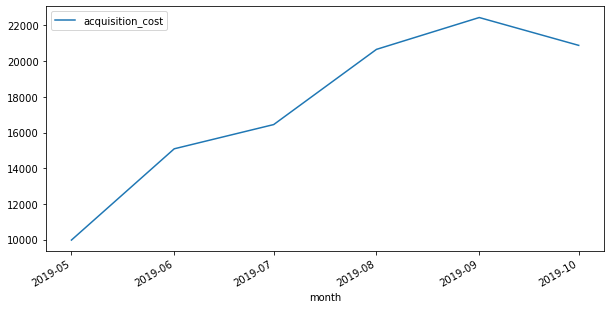

In [33]:
channel_costs_monthly.plot(figsize=(10,5), legend = True)

Максимальные расходы на рекламу были в августе, сентябре и октябре 2019 года. При этом в начале исследуемого периода (май) расходы на рекламу были в 2 раза ниже, чем в конце исследуемого периода (октябрь).

In [34]:
channel_monthly = profiles.groupby(['month','channel']).agg({'acquisition_cost':'sum'})
display(channel_monthly)

acquisition_cost
month      channel                             
2019-05-01 AdNonSense                   1169.70
           FaceBoom                     3524.40
           LeapBob                       140.28
           MediaTornado                  238.56
           OppleCreativeMedia            169.75
...                                         ...
2019-10-01 TipTop                      12250.00
           WahooNetBanner                942.00
           YRabbit                       163.41
           lambdaMediaAds                213.60
           organic                         0.00

[66 rows x 1 columns]

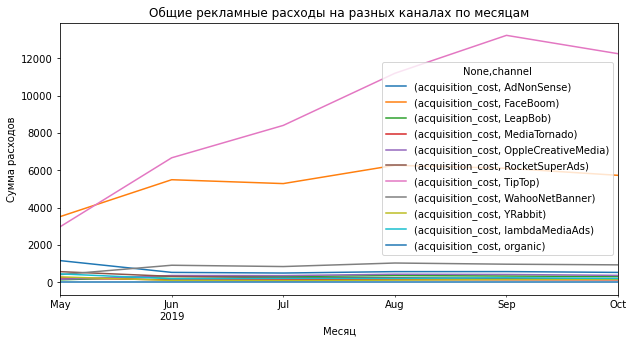

In [35]:
channel_monthly.unstack('channel').plot(figsize=(10,5), legend = True)
plt.title('Общие рекламные расходы на разных каналах по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.show()

Максимальные расходы на рекламу, начиная с июня были на источнике TipTop. На втором месте - FaceBoom. При этом расходы на другие истоники остаются без изменений на протяжении всего периода (и очень низкими).
Соответственно, прирост расходов в августе-октябре произошел из-за вложений прежде всего в TipTop и FaceBoom.

In [36]:
#рассчитаем средний CAC на одного пользователя

In [41]:
CAC_total=profiles['acquisition_cost'].mean()
print('Стоимость привлечения одного клиента:', CAC_total)

Стоимость привлечения одного клиента: 0.7032778251827625


In [39]:
CAC_adv_total=profiles.query('channel != "organic"').agg({'acquisition_cost':'mean'})
print('Стоимость привлечения одного клиента из рекламных источников:', CAC_adv_total.round(3))                                      

Стоимость привлечения одного клиента из рекламных источников: acquisition_cost    1.127
dtype: float64


In [ ]:
#рассчитаем средний CAC для каждого источника трафика

In [42]:
CAC_by_channel = profiles.groupby(['channel']).agg({'user_id':'count', 'acquisition_cost':'mean'}).rename(columns={'user_id':'user_qnt','acquisition_cost':'CAC'}).sort_values(by='CAC', ascending = False)
display(CAC_by_channel)

,user_qnt,CAC
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


Из таблицы видно, что самая дорогая стоимость привлечения клиентов из источника TipTop, САС других рекламных площадок значительно ниже.

In [43]:
#посчитаем САС для разных каналов привлечения клиентов
CAC_monthly_by_channel = profiles.groupby(['month','channel']).agg({'acquisition_cost':'mean'}).rename(columns={'acquisition_cost':'CAC'})
display(CAC_monthly_by_channel)

CAC
month      channel                     
2019-05-01 AdNonSense          1.027856
           FaceBoom            1.105868
           LeapBob             0.201842
           MediaTornado        0.226768
           OppleCreativeMedia  0.243544
...                                 ...
2019-10-01 TipTop              3.543535
           WahooNetBanner      0.609314
           YRabbit             0.234112
           lambdaMediaAds      0.707285
           organic             0.000000

[66 rows x 1 columns]

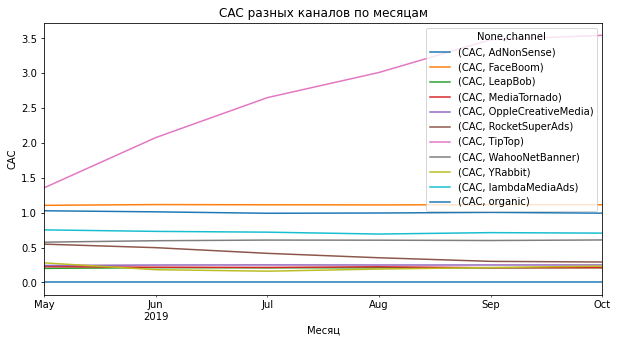

In [44]:
CAC_monthly_by_channel.unstack('channel').plot(figsize=(10,5), legend = True)
plt.title('CAC разных каналов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.show()

Из графика явно видно, что CAC почти всех каналов остается постоянным на протяжении всего исследуемого периода за исключением источника TipTop. Для этого источника наблюдаем резкий рост стоимости привлечения одного клиента. При этом несмотря на достаточно высокие общие расходы на FaceBoom и их прирост во времени, САС этого источника остается стабильным.

**Выводы**<br>
<br>
При анализе общих вложений в рекламу видно, что начиная с мая идет значительный прирост маркетинговых расходов с пиком в сентябре-октябре. Если разбить эти расходы по каналам привлечения, то можно сделать вывод, что рекламный бюджет увеличился за счет вложений в канал TipTop, который является самым затратным и показывает максимальный прирост расходов. На втором месте - FaceBoom, но расходы на него хотя и относительно высокие, но достаточно стабильные в этот период. Что касается других каналов привлечения, то расходы на них стабильно невысокие.<br>
При анализе стоимости привлечения клиентов из каждого источника можно сделать вывод, что стоимость привлечения клиентов из TipTop неуклонно растет с ростом вложений, следовательно, количество клиентов растет более медленными темпами, чем расходы на их привлечение. Для FaceBoom мы видем стабильные показатели для CAC, предварительно можно сделать вывод, что расходы на данный источник окупаются несмотря на их увеличение во времени.


# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [45]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

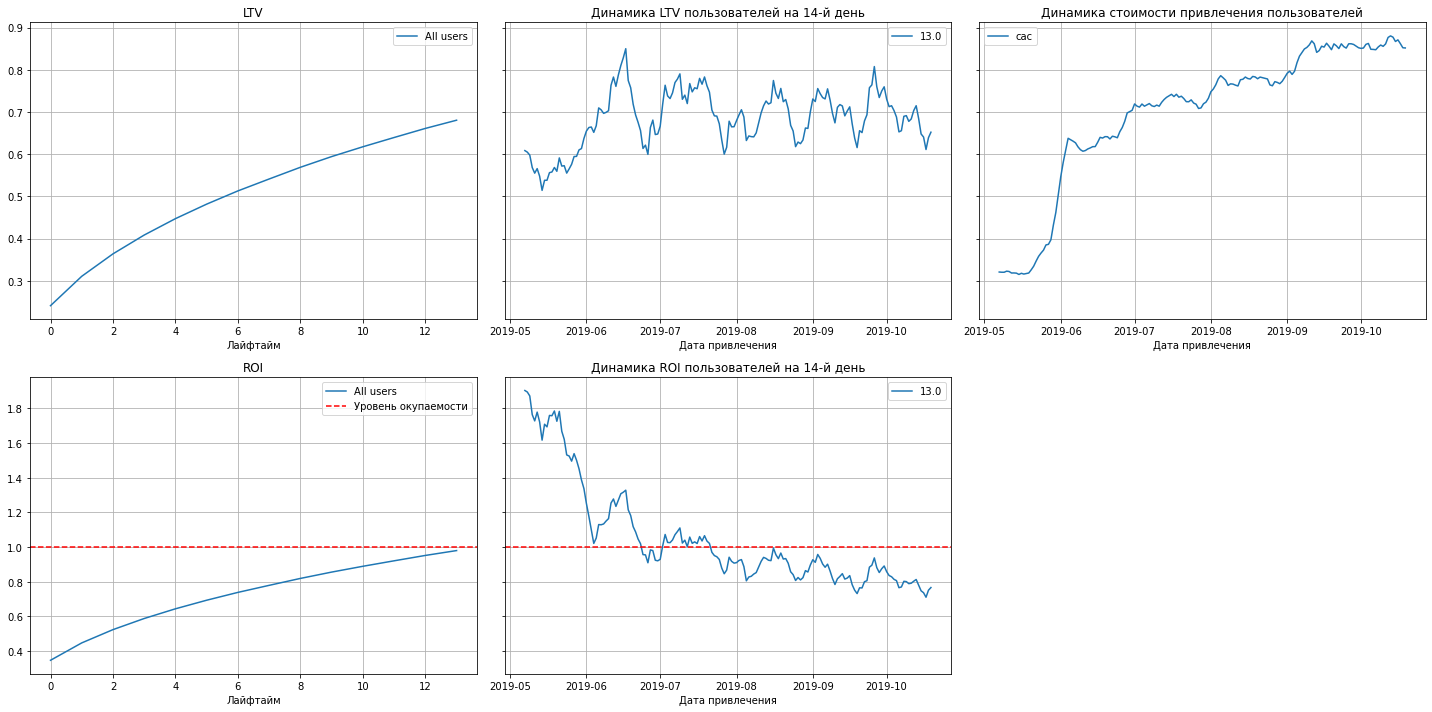

In [46]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**По графикам можно сделать такие выводы:**
<br>
- Реклама не окупается. ROI в конце интересующего периода так и не пересекло линию в 100%.<br>
- CAC значительно вырос с июня, в сентябре-октябре стабильный небольшой прирост.<br>
- LTV в середине месяца выше за исключением показателей сентября-октября, но в целом этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.<br>
- Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

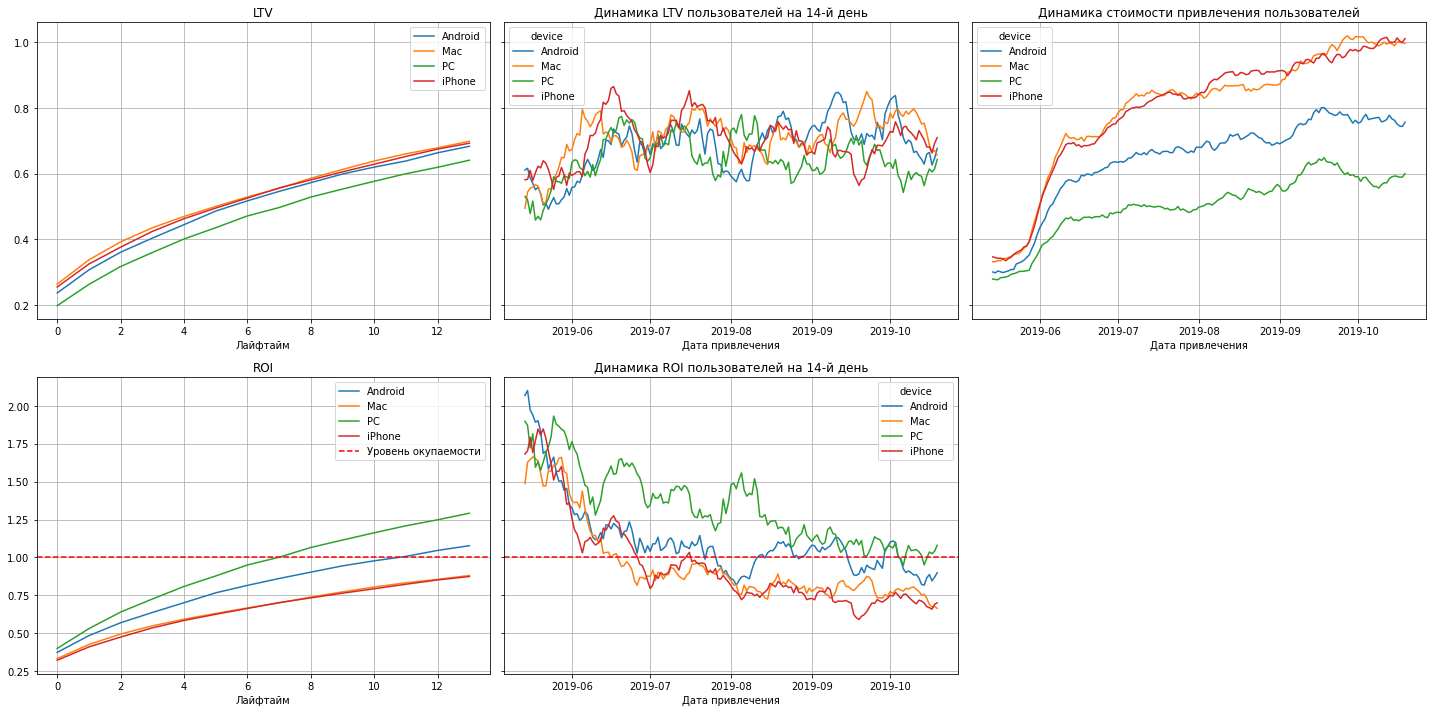

In [47]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**С разбивкой по устройствам можно сделать следующие выводы:**
- Стоимость привлечения максимальная для пользователей Mac и iPhone, дешевле всего привлечение пользователей PC.
- Реклама окупается не для всех устройств: пользователи PC и Android пересекают линию безубыточности, в отличие от пользователей Mac и iPhone, среди которых больше пользователей приложения в принципе и больше платящих пользователей в частности.
- LTV стабилен.
- Явные аутсайдеры по окупаемости - пользователи iPhone и Mac.
- В целом наблюдаем снижение ROI на 14 день во времени для пользователей всех устройств: до роста рекламных расходов оно было значительно выше, т.е. ранее вложения окупались.

### Проанализируйте окупаемость рекламы с разбивкой по странам

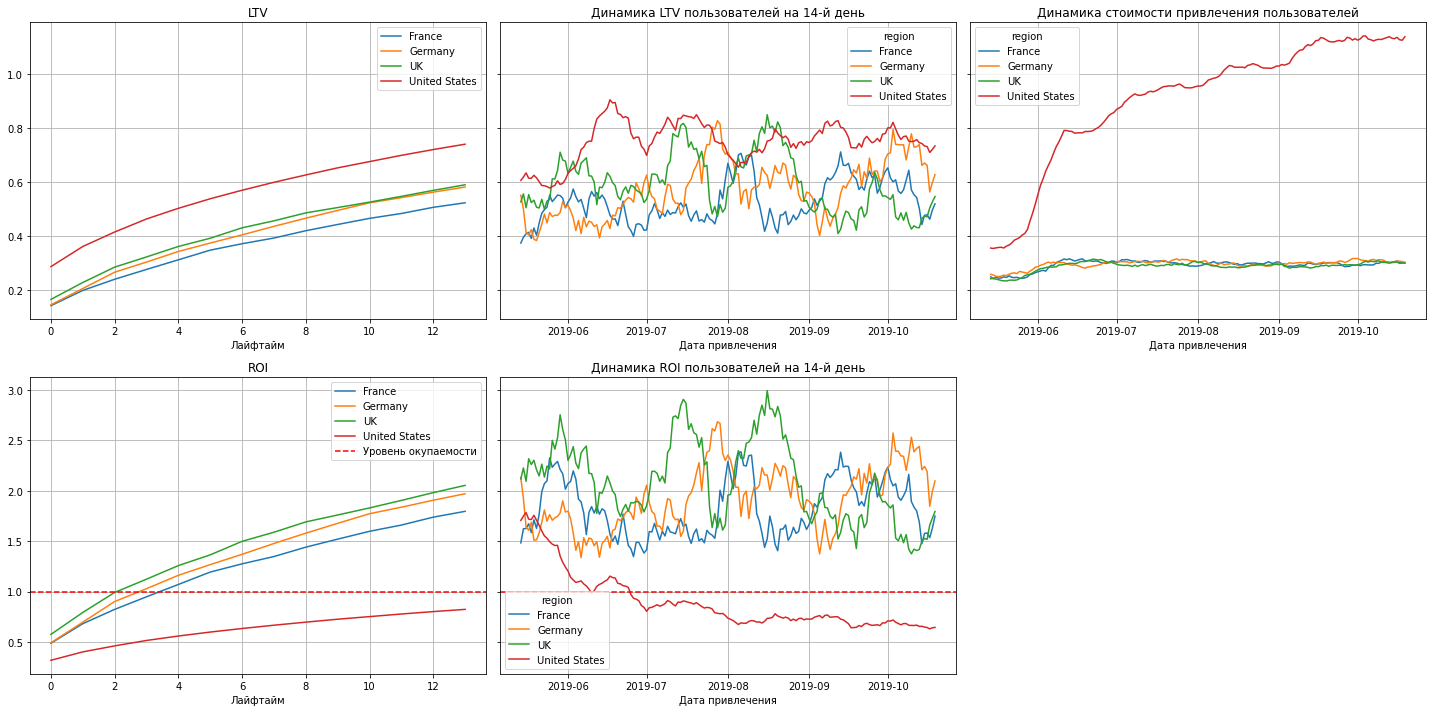

In [48]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**С разбивкой по странам можно сделать следующие выводы:**
- Стоимость привлечения максимальная для жителей США, стоимтость привлечения пользователей других стран стабильна.
- Реклама для жителей США не окупается, в отличие от рекламы для пользователей из Франции, Германии и Великобритании, которая окупается всегда уже с 3 дня лайфтайма.
- LTV выше и более стабильна на 14 день независимо от месяца привлечения для пользователей из США
- LTV пользователей Великобритании имеет сезонность и более выражен в конце месяца.
- В целом наблюдаем снижение ROI на 14 день во времени для пользователей из США: до роста рекламных расходов оно было значительно выше, т.е. ранее вложения окупались. ROI на 14 день для жителей других стран хоть и изменяется во времени, но всегда находится выше уровня окупаемости.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

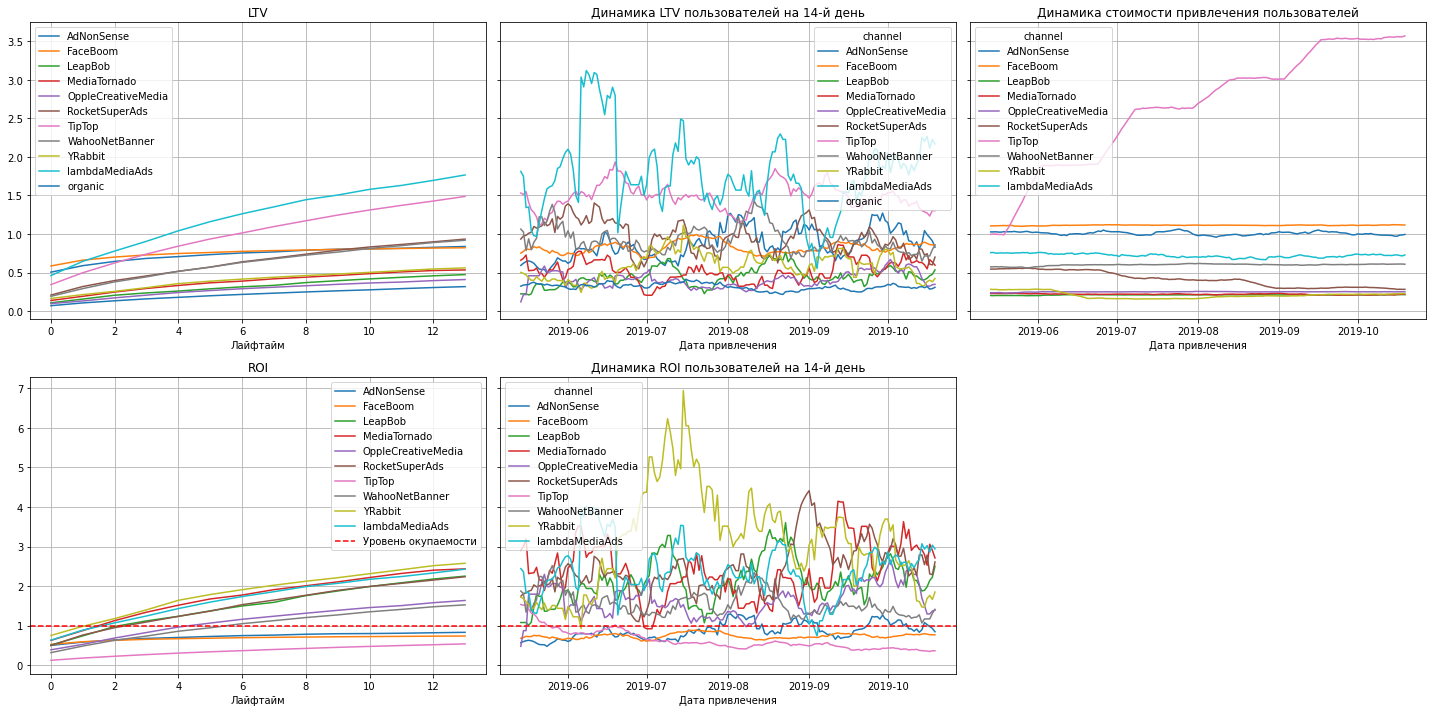

In [49]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**С разбивкой по источникам привлечения можно сделать следующие выводы:**
- LTV выше у пользователей, привлеченных из lambdaMediaAds, TipTop. LTV других пользователей более низкий и меньше прирастает на протяжении лайфтайма.
- LTV пользователей lambdaMediaAds на 14 день нестаблен в разные месяцы исследования, имеет "выспышки" в конце месяца, максимальная пришлась на июнь-июль. LTV пользователей TipTop постоянный на протяжении разных периодов. LTV других источников тоже более-менее стабилен.
- Стоимость привлечения с июня максимальная для TipTop, стоимость привлечения пользователей из других источников стабильна на протяжении изучаемого периода.
- Не окупается реклама в AdNoSense, FaceBoom и TipTop. 
- На 14 день аномальная вспышка ROI была для пользователей, привлеченных из YRabbit. Стабильно на протяжении всего исследуемого периода не окупаются рекламные вложения в TipTop, FaceBoom. Спорный AdNoSense, т.к. в некоторые периоды он выше уровня окупаемости. Остальные источники привлечения на 14 день показывают ROI выше уровня окупаемости.

### Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

**Построим графики конверсии и удержания по устройствам**

Text(0.5, 1.0, 'Кривые конверсии по устройствам')

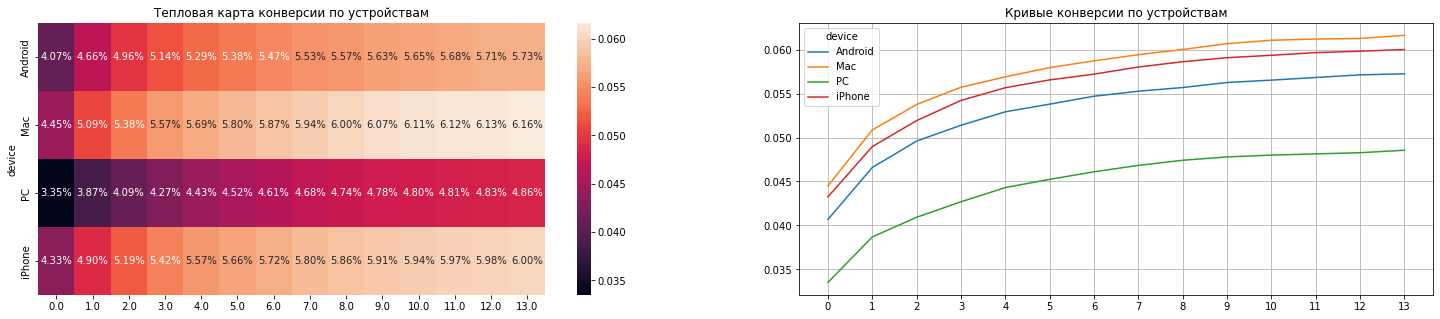

In [50]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize = (25, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по устройствам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по устройствам')

По светлым пятнам хитмепа видно, что лучшее удержание показали пользователи Mac и iPhone. Для них показатель удержания первого дня составляет около 4,5%, а на 14 - выше 6%. Удержание пользователей PC самая низкая: она составляет 3,35% в первый день, а на 14 - не доходит до 5%. Пользователи всех других устройств пересекают отметку в 5% на 2-3-4 день. Кривые удержания также отражают эту же динамику.

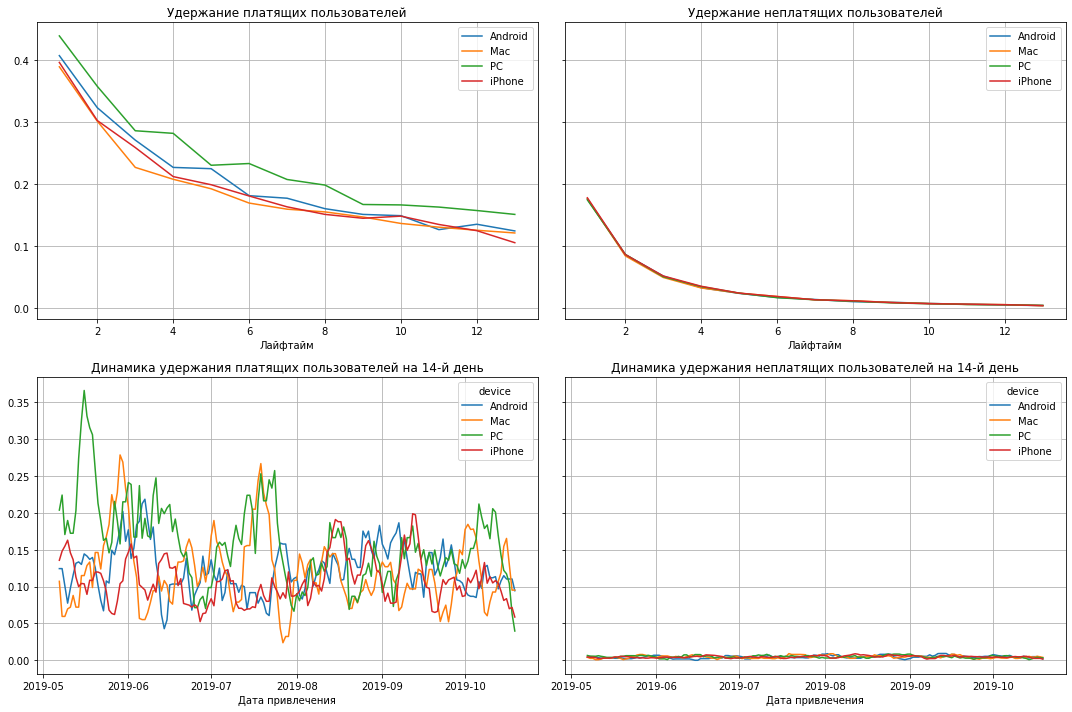

In [51]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14   # горизонт анализа
dimensions=['device']

# постройте таблицу удержания
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions) # ваш код здесь

plot_retention(retention, retention_history, 14)

Удержание платящих пользователей выше, чем неплатящих. 
Интересно, что удержание пользователей PC на 14 день было выше в мае-июне, а потом снижалось. У пользователей PC и Mac наблюдается более ярко выраженная сезонность удержания на 14 день, в отличие от пользователей Android или iPhone. Удержание неплатящих пользователей значительно ниже и практически равно 0 на 14 день.

**Построим графики конверсии и удержания по странам**

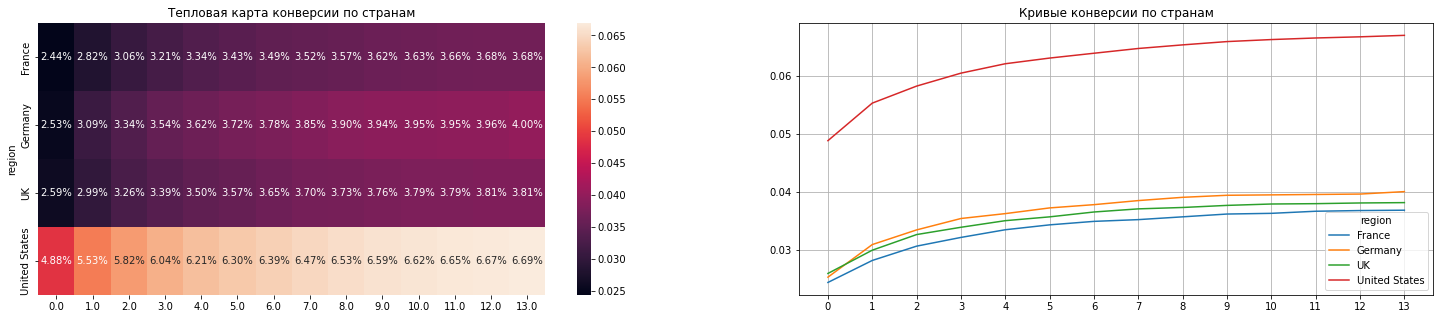

In [52]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize = (25, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

США показывают самую высокую конверсию с самого первого месяца. Несмотря на то, что в первый месяц жители Германии, Франции и Великобратании показывают примерно одинаковый уровень конверсии, со временем этот показатель улучшается для Германии.

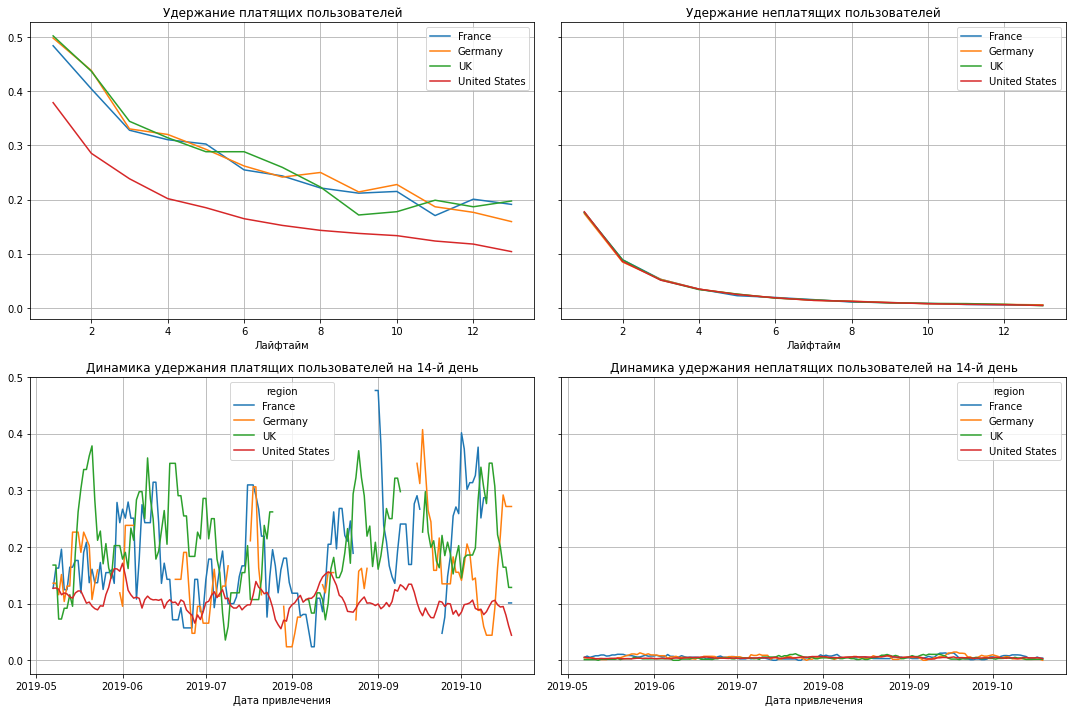

In [53]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14   # горизонт анализа
dimensions=['region']

# постройте таблицу удержания
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions) # ваш код здесь

plot_retention(retention, retention_history, 14)

На графике удержания платящих пользователей из США с некоторым удивлением можно отметить, что его уровень значительно ниже для пользователей США по сравнению с пользователями из других стран. График удержания неплатящих пользователей по всем странам идентичен. По динамике удержания платящих пользователей на 14 дней видно, что удержание пользователей из Германии, Франции и Великобритании выше, чем пользователей из США. Но имеет при это больший разброс по периодам. График удержания неплатящих пользователей одинаковый на 14 день для всех стран и стремится к 0.

**Построим карты конверсии и удержания по рекламным каналам**

Text(0.5, 1.0, 'Кривые конверсии по рекламным каналам')

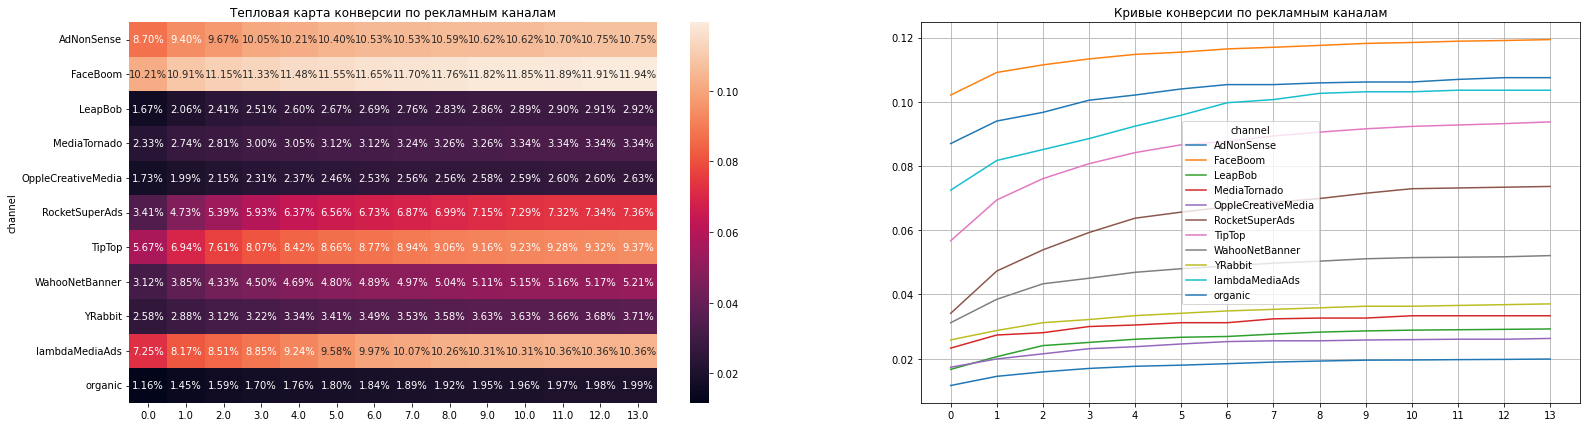

In [54]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize = (26, 7)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по рекламным каналам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по рекламным каналам')

По светлым пятнам на хитмэпа видно, что лучшую конверсию на протяжении всего лайфтайма показывают пользователи, привлечённые из FaceBoom, затем пользователи AdNoSense и LambdaMediaAds. Для всех них конверсия в платящие пользователи на 14 день составляет более 10%. Наихудшие результаты по конверсии помимо органических пользователей показывают пользователи, пришедшие из LeapBoom, OppleCreativeMedia: их конверсия на 14 день составляет менее 3%.

Эту же ситуацию мы наблюдаем на кривых конверсии по рекламным каналам.

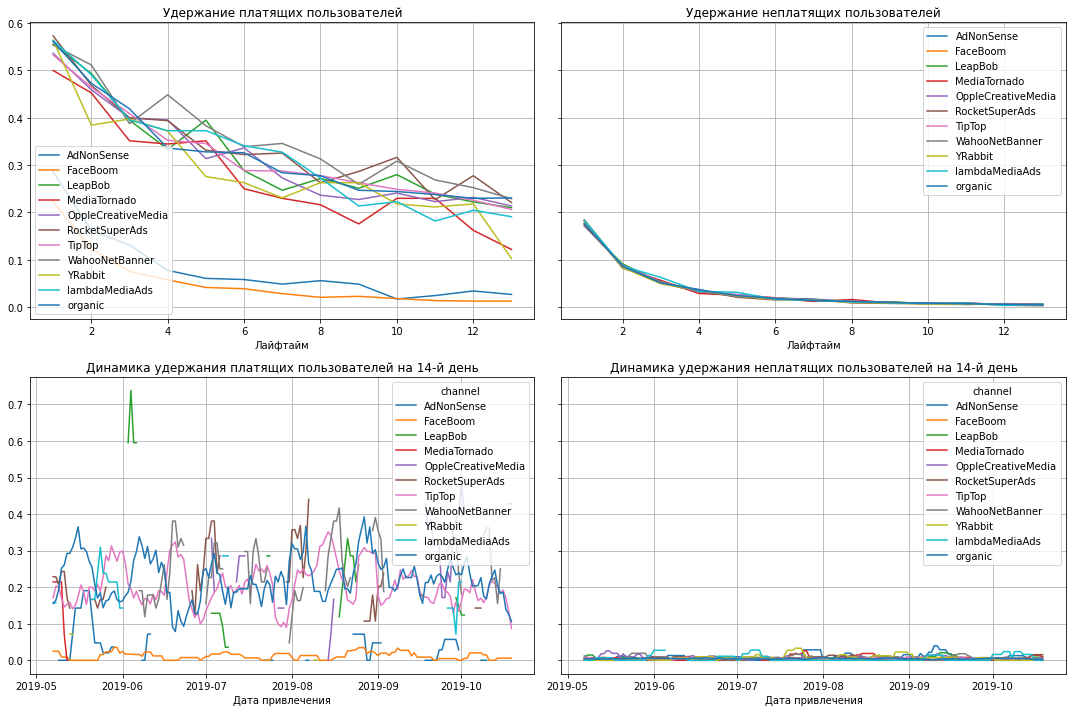

In [55]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14   # горизонт анализа
dimensions=['channel']

# постройте таблицу удержания
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions) # ваш код здесь

plot_retention(retention, retention_history, 14)

Удержание платящих пользователей ниже всего для AdNoSense и FaceBoom. Для остальных каналов оно находится примерно на одном уровне, независимо от источника привлечения. Удержание неплатящих пользователей для всех каналов привлечения, включая органику, одинаковый.
На 14 день удержание пользователей с FaceBoom стремится к 0 отметке. У AdNoSense есть как провалы, так и взлеты в зависимости от месяца. Для остальных каналов за исключением LeapBob динамика удержания на протяжении исследоваемого периода примерно одинаковая. Графики удержания неплатящих пользователей на 14 дней очень похожи и выстроены вокруг 0 отметки.

Text(0.5, 1.0, 'Кривые конверсии по странам и рекламным каналам')

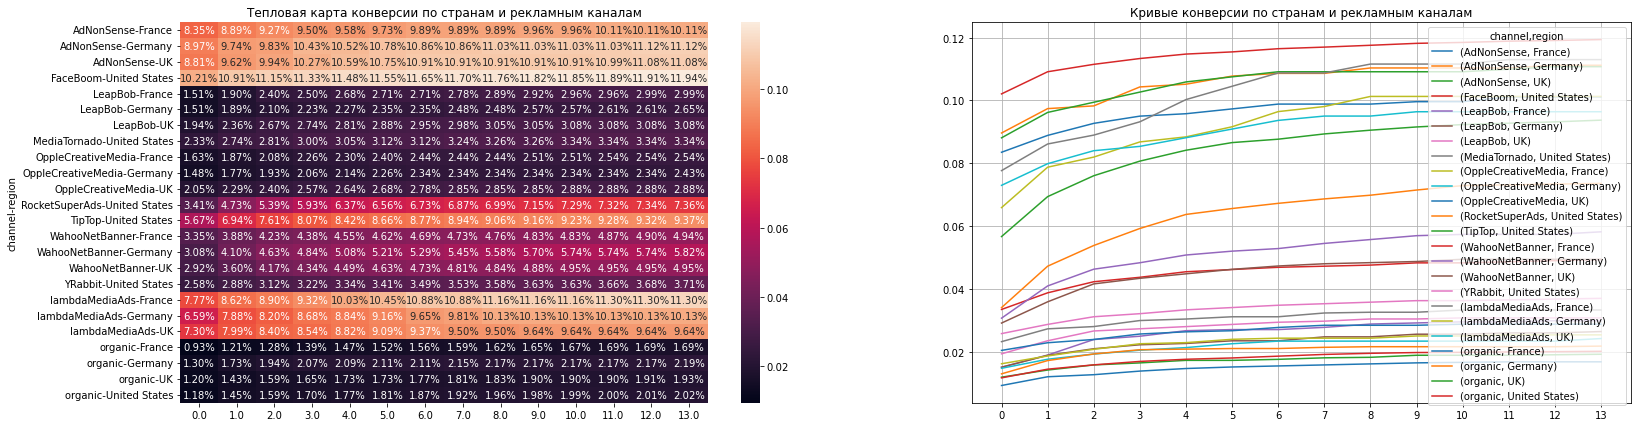

In [56]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel','region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize = (26, 7)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам и рекламным каналам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам и рекламным каналам')

Из хитмепа для стран и каналов видно, что самая высокая конверсия для AdNoSense и Lambda Media для Франции, Германии и Великобритании, в США - для FaceBoom и TipTop. При этом пользователи из TipTop и AdNoSense показывают самый низкий уровень удержания. Реклама, размещенная на FaceBoom, AdNosense и TipTop не окупается.

Text(0.5, 1.0, 'Кривые конверсии по устройствам и рекламным каналам')

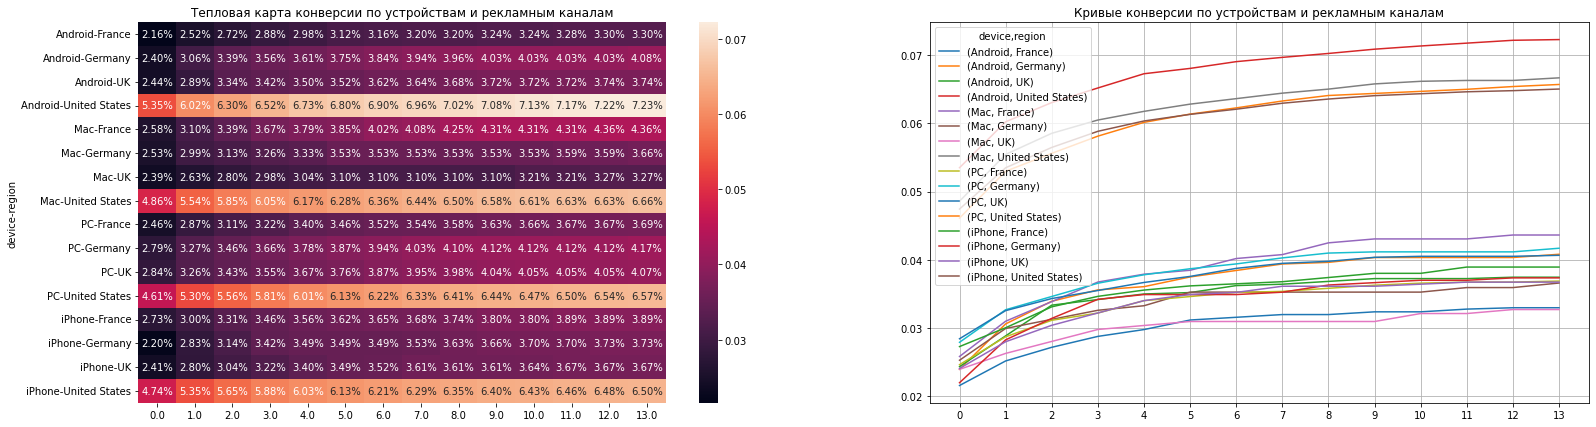

In [57]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device','region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize = (26, 7)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по устройствам и рекламным каналам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по устройствам и рекламным каналам')

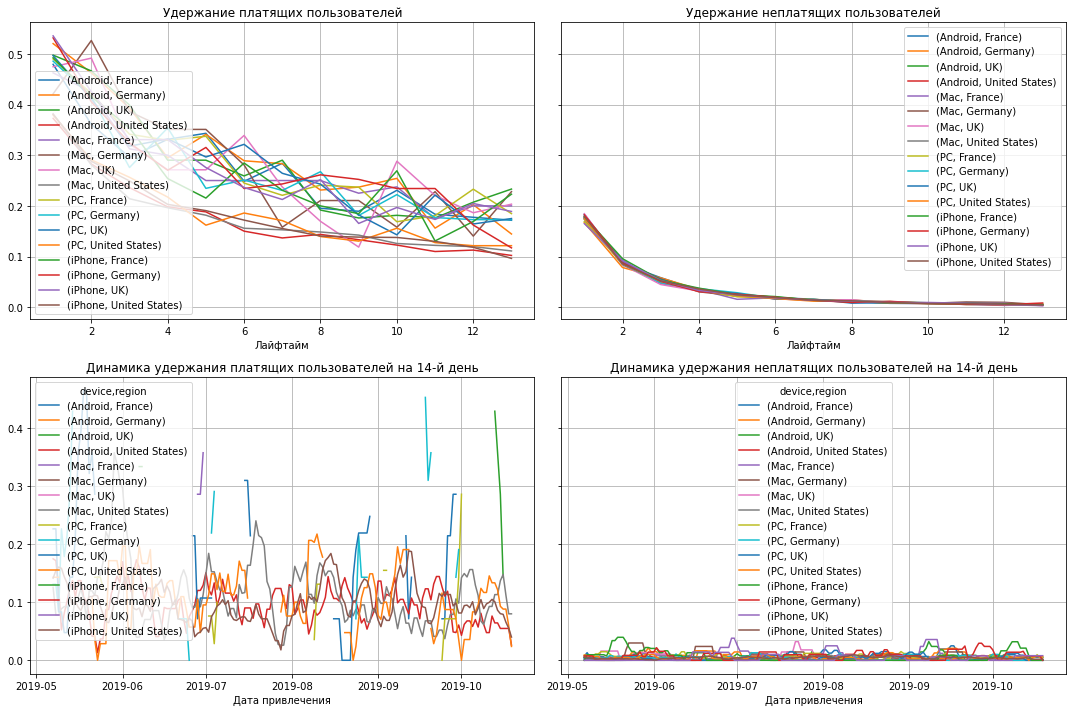

In [58]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14   # горизонт анализа
dimensions=['device','region']

# постройте таблицу удержания
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions) # ваш код здесь

plot_retention(retention, retention_history, 14)

По устройстам и странам мы видим, что несмотря на высокую конверсию в США удержание этих пользователей остается стабильно низким, несмотря на устройства. Т.о. проблема не в багах устройства.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

## Изучение данных из файла

Таблица о визитах состоит из 6 столбцов и 309901 строки.
Таблица о заказах состоит из 3 столбцов и 40212 строк.
Таблица о стоимостях состоит из 3 столбцов и 1800 строк.

Во всех таблицах встречаются разные типы данных: количественные переменные (вещественные), категориальные переменные, вещественные переменные.

Дубликатов и пропусков данных не выявлено.

Из всех представленных данных необходимо было преобразовать данные с датами (Session Start, Session End, Event Dt, dt) из формата Object в формат date_time.

## Исследовательский анализ данных

### По странам
Чаще всего посетители приходят из США. Разрыв с другими странами очень существенный: больше, чем в 5 раз. 
Число платящих пользователей также выше в США: в 10 раз больше по сравнению с другими странами. 
Доля платящих пользователей среди всех посетителей также выше в США (6,9%), на втором месте со значительным отставанием - Германия (4,11%)
Таким образом, пользователи из США не только чаще пользуются приложением, они же чаще оплачивают в нем дополнительные покупки.

### По устройствам
Чаще всего пользователи используют iPhone, на втором месте смартфоны на базе Android (в 1,5 раза меньше). Третье делят с небольшим отрывом пользователи PC и Mac. 
Платящие пользователи используют iPhone, на втором месте - смартфоны на базе Android. На третьем - пользователи Mac.
Доля платящих пользователи с Mac максимальна - 6,36%, на втором месте - iPhone (доля 6,20%). На третьем и четвертом, соответственно, Android и PC. 
Таким образом, несмотря на то, что, например, количество пользователей PC и Mac в целом равно, платят чаще пользователи Mac.

### По рекламным каналам
Чаще всего пользователи приходили самостоятельно без рекламы (почти в 2 раза чаще, чем по первому источнику рекламы). Второй по численности поток идет с Faceboom, третий - c TipTop. Все остальные каналы сильно отстают по численности привлекаемых посетителей.

Платящие пользователи в абсолютных значениях чаще всего приходят от рекламы на FaceBoom, затем с TipTop, на третьем месте - те, кто пришли самостоятельно.

Наиболее велика доля платящих пользователей среди пришедших после рекламы на FaceBoom, AdNonSense, lambdaMediaAds: из каждого источника доля платящих пользователей от 10% и выше. Меньше всего доля платящих пользователей среди тех, кто пришел самостоятельно.

### Выводы:
Максимальное количество пользователей в целом наблюдается среди:
- лиц, проживающих в США,
- пользователей iPhone,
- пришедших органически.
Максимальное количество платящих пользователей в абсолютных значениях - это:
- лица, проживающие в США,
- пользователи iPhone,
- пришедшие после рекламы в FaceBoom.
Максимальная доля платящих пользователей наблюдается среди:
- пользователей, проживающих в США,
- пользователей iPhone и Mac,
- пришедших после рекламы на FaceBoom, AdNonSense, lambdaMediaAds.


## Маркетинг

**Общие расходы на рекламу** за весь исследуемый период составили: 105497.0
**Стоимость привлечения одного клиента:** 0.703
**Стоимость привлечения одного клиента из рекламных источников:** 1.127

<br>
При анализе общих вложений в рекламу видно, что начиная с мая идет значительный прирост маркетинговых расходов с пиком в сентябре-октябре. Если разбить эти расходы по каналам привлечения, то можно сделать вывод, что рекламный бюджет увеличился за счет вложений в канал TipTop, который является самым затратным и показывает максимальный прирост расходов. На втором месте - FaceBoom, но расходы на него хотя и относительно высокие, но стабильные в этот период. Что касается других каналов привлечения, то расходы на них невысокие.<br>
При анализе стоимости привлечения клиентов из каждого источника можно сделать вывод, что стоимость привлечения клиентов из TipTop неуклонно растет с ростом вложений, следовательно, количество клиентов растет более медленными темпами, чем расходы на их привлечение. Для FaceBoom мы видем стабильные показатели для CAC, предварительно можно сделать вывод, что расходы на данный источник окупаются лучше даже с учетом их роста во времени.


## Оценка окупаемости рекламы

**По общим графикам можно сделать такие выводы:**
<br>
- Реклама не окупается. ROI в конце интересующего периода так и не пересекло линию в 100%.<br>
- CAC значительно вырос с июня, в сентябре-октябре стабильный небольшой прирост.<br>
- LTV в середине месяца выше за исключением показателей сентября-октября, но в целом этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.<br>

**С разбивкой по устройствам можно сделать следующие выводы:**
- Стоимость привлечения максимальная для пользователей Mac и iPhone, дешевле всего привлечение пользователей PC.
- Реклама окупается не для всех устройств: пользователи PC и Android пересекают линию безубыточности, в отличие от пользователей Mac и iPhone, среди которых больше пользователей приложения в принципе и больше платящих пользователей в частности.
- LTV стабилен.
- Явные аутсайдеры по окупаемости - пользователи iPhone и Mac.
- В целом наблюдаем снижение ROI на 14 день во времени для пользователей всех устройств: до роста рекламных расходов оно было значительно выше, т.е. ранее вложения окупались.

**С разбивкой по странам можно сделать следующие выводы:**
- Стоимость привлечения максимальная для жителей США, стоимость привлечения пользователей других стран ниже.
- Реклама для жителей США не окупается, в отличие от рекламы для пользователей из Франции, Германии и Великобритании, которая окупается всегда уже с 3 дня лайфтайма.
- LTV более стабильна на 14 день независимо от месяца привлечения для пользователей из США.
- LTV пользователей Великобритании имеет сезонность и более выражен в конце месяца.
- Наблюдаем снижение ROI на 14 день во времени для пользователей из США: до роста рекламных расходов оно было значительно выше, т.е. ранее вложения окупались. ROI на 14 день для жителей других стран хоть и изменяется во времени, но всегда находится выше уровня окупаемости.

**С разбивкой по источникам привлечения можно сделать следующие выводы:**
- LTV выше у пользователей, привлеченных из lambdaMediaAds, TipTop. LTV других пользователей более низкий и меньше прирастает на протяжении лайфтайма.
- LTV пользователей lambdaMediaAds на 14 день нестаблен в разные месяцы исследования, имеет "выспышки" в конце месяца, максимальная пришлась на июнь-июль. LTV пользователей TipTop постоянный на протяжении разных периодов. LTV других источников тоже более-менее стабилен.
- Стоимость привлечения с июня максимальная для TipTop, стоимость привлечения пользователей из других источников стабильна на протяжении изучаемого периода.
- Не окупается реклама в AdNoSense, FaceBoom и TipTop. 
- На 14 день аномальная вспышка ROI была для пользователей, привлеченных из YRabbit. Стабильно на протяжении всего исследуемого периода на 14 дкеь не окупаются рекламные вложения в TipTop, FaceBoom. Спорный AdNoSense, т.к. в некоторые периоды он выше уровня окупаемости. Остальные источники привлечения на 14 день показывают ROI выше уровня окупаемости.


**Графики конверсии и удержания**

**По устройствам**

Лучшее удержание у пользователей Mac и iPhone. Для них показатель удержания первого дня составляет около 4,5%, а на 14 - выше 6%. Удержание пользователей PC самая низкая: она составляет 3,35% в первый день, а на 14 - не доходит до 5%. Пользователи всех других устройств пересекают отметку в 5% на 2-3-4 день. Кривые удержания также отражают эту же динамику.
Удержание платящих пользователей выше, чем неплатящих. 
Интерсно, что удержание пользователей PC на 14 день было выше в мае-июне, а потом снижалось. У пользователей PC и Mac наблюдается более ярко выраженная сезонность удержания на 14 день, в отличие от пользователей Android или iPhone. Удержание неплатящих пользователей значительно ниже и практически равно 0 на 14 день.

**По странам**

США показывают самую высокую конверсию с самого первого месяца. Несмотря на то, что в первый месяц жители Германии, Франции и Великобратании показывают примерно одинаковый уровень конверсии, со временем этот показатель улучшается для Германии.
На графике удержания платящих пользователей из США с некоторым удивлением можно отметить, что его уровень значительно ниже для пользователей США по сравнению с пользователями из других стран. По динамике удержания платящих пользователей на 14 дней видно, что удержание пользователей из Германии, Франции и Великобритании выше, чем пользователей из США. Но имеет при это больший разброс по периодам.
График удержания неплатящих пользователей по всем странам идентичен.  График удержания неплатящих пользователей одинаковый на 14 день для всех стран и стремится к 0.

**По рекламным каналам**

Лучшую конверсию на протяжении всего лайфтайма показывают пользователи, привлечённые из FaceBoom, затем пользователи AdNoSense и LambdaMediaAds. Для всех них конверсия в платящие пользователи на 14 день составляет более 10%. Наихудшие результаты по конверсии помимо органических пользователей показывают пользователи, пришедшие из LeapBoom, OppleCreativeMedia: их конверсия на 14 день составляет менее 3%.

Эту же ситуацию мы наблюдаем на кривых конверсии по рекламным каналам

Удержание платящих пользователей ниже всего для AdNoSense и FaceBoom. Для остальных каналов оно находится примерно на одном уровне, независимо от источника привлечения. Удержание неплатящих пользователей для всех каналов привлечения, включая органику, одинаковый.
На 14 день удержание пользователей с FaceBoom стремится к 0 отметке. У AdNoSense есть как провалы, так и взлеты в зависимости от месяца. Для остальных каналов за исключением LeapBob динамика удержания на протяжении исследоваемого периода примерно одинаковая. Графики удержания неплатящих пользователей на 14 дней очень похожи и выстроены вокруг 0 отметки.

Из хитмепа для стран и каналов видно, что самая высокая конверсия для AdNoSense и Lambda Media для Франции, Германии и Великобритании, в США - для FaceBoom и TipTop. При этом пользователи из TipTop и AdNoSense показывают самый низкий уровень удержания. При этом реклама, размещенная на FaceBoom, AdNosense и TipTop не окупается.

## Рекомендации

1. Необходимо обратить пристальное внимание на пользователей из США: при высокой конверсии из рекламных источников, уровень удержания этих клиентов значительно ниже, чем пользователей из других стран. Соответвенно, надо проверить, с какими проблемами могут сталкиваться пользователи этого региона в процессе использования приложения, которые останавливают их от использования его в дальнейшем.

2. Необходимо сократить маркетинговые расходы для рекламы в TipTop и AdNoSence: кроме высокой конверсии данные источники не дают ничего больше, пользователи удерживаются плохо, реклама не окупается.

3. Под вопросом реклама на FaceBoom: маркетинговые расходы необходимо сократить, но источник является качественным по конверсии и удержанию, возможно, есть варианты по его оптимизации (другой формат оплат за рекламу?).

4. В целом, надо уделить больше внимания рекламе для пользователей из Европы, потому что они показывают большую лояльность приложению. Возможно, следует перенаправить рекламный бюджет на другие рекламные каналы Европы (например, Waa-Hoo или искать новые) и больше работать с конверсией из рекламных источников.